## csv파일 불러오기

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/user/Desktop/cmpd.csv')
print(df.head())
print(len(df))

df = df.dropna()
print(len(df))

                      inchikey  \
0  FNHKPVJBJVTLMP-UHFFFAOYSA-N   
1  CUDVHEFYRIWYQD-UHFFFAOYSA-N   
2  TTZSNFLLYPYKIL-UHFFFAOYSA-N   
3  UOVCGJXDGOGOCZ-UHFFFAOYSA-N   
4  CUIHSIWYWATEQL-UHFFFAOYSA-N   

                                              smiles  group activity  
0  CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...  train   active  
1  CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...  train   active  
2  Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...   test   active  
3       COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2  train   active  
4  Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...   test   active  
5530
5530


## 데이터 탐색

In [20]:
df['inchikey'].value_counts()

PHXJVRSECIGDHY-UHFFFAOYSA-N    4
PIQCTGMSNWUMAF-UHFFFAOYSA-N    3
CUDVHEFYRIWYQD-UHFFFAOYSA-N    3
DXCUKNQANPLTEJ-UHFFFAOYSA-N    3
WOSKHXYHFSIKNG-UHFFFAOYSA-N    3
                              ..
DTWGYWUIWVOFBV-UHFFFAOYSA-N    1
GLDPXWNDIUPOHH-UHFFFAOYSA-N    1
SNNUMARRAFQOGY-UHFFFAOYSA-N    1
KRYZCYZIWKIKGN-UHFFFAOYSA-N    1
CZXAZXLPPWLLGJ-UHFFFAOYSA-N    1
Name: inchikey, Length: 5489, dtype: int64

In [21]:
df['smiles'].value_counts()

CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc34)ccc12                       3
COc1cc2nccc(Oc3ccc(NC(=O)NC4CC4)c(Cl)c3)c2cc1C(N)=O                          3
COc1cc(OC)cc(N(CCNC(C)C)c2ccc3ncc(-c4cnn(C)c4)nc3c2)c1                       2
Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S(N)(=O)=O                      2
CCN(CC)CCOc1ccc(Nc2ncc3cc(-c4c(Cl)cccc4Cl)c(=O)n(C)c3n2)cc1                  2
                                                                            ..
Cc1cnc(NC(=O)Nc2cc(Br)c(C)cc2OC[C@@H]2CNCCO2)cn1                             1
Fc1ccc2c(-c3nc4cc(N5CCC(N6CCCCC6)CC5)ccc4[nH]3)[nH]nc2c1                     1
CNC(=O)n1ccc2cc(Oc3ccnc(NC(=O)c4ccc(C5CN(CC(C)(C)O)C5)cc4)c3)c(OCCOC)cc21    1
CCCCC(=O)Nc1cc(-c2c[nH]c3ncccc23)cc(Cl)n1                                    1
O=C1Nc2ncccc2/C1=C/c1ccc(N2CCOCC2)cc1                                        1
Name: smiles, Length: 5507, dtype: int64

In [22]:
df['activity'].value_counts()

active          2704
inactive        1886
unknown          599
intermediate     341
Name: activity, dtype: int64

## 데이터 전처리

### unknown삭제

In [23]:
# NaN 값 확인
print(df.isna().any())
print(f'\n{df.isnull().any()}\n\n\n')

# unknown 삭제
df = df[df['activity'] != 'unknown'].copy()
df['activity'].value_counts()

inchikey    False
smiles      False
group       False
activity    False
dtype: bool

inchikey    False
smiles      False
group       False
activity    False
dtype: bool





active          2704
inactive        1886
intermediate     341
Name: activity, dtype: int64

### active는 1 나머지는 0(이진분류)

In [24]:
from sklearn.preprocessing import LabelEncoder

# 문자열이 포함된 열을 숫자형으로 변환
label_encoder = LabelEncoder()
df['inchikey'] = label_encoder.fit_transform(df['inchikey'])
df['smiles'] = label_encoder.fit_transform(df['smiles'])

# active는 1 나머지는 0
df['activity'] = df['activity'].map({'active':'1', 'inactive':'0', 'intermediate':'0'})
df['activity'].unique()

array(['1', '0'], dtype=object)

In [25]:
df_train = df[df['group'] == 'train']
print(len(df_train))
df_test = df[df['group'] == 'test']
print(len(df_test))

3491
1440


In [26]:
array_train = df_train.values
x_train = array_train[:, 0:2]
y_train = array_train[:, 3]

array_test = df_test.values
x_test = array_test[:, 0:2]
y_test = array_test[:, 3]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3491, 2) (1440, 2) (3491,) (1440,)


## feature 표준화

In [27]:
from sklearn.preprocessing import StandardScaler
# feature 표준화
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

## feature 정규화

In [28]:
from sklearn.preprocessing import MinMaxScaler
# feature 정규화
scaler = MinMaxScaler() 
scaler.fit(x_train)  
x_train = scaler.transform(x_train)

scaler = MinMaxScaler() 
scaler.fit(x_test)  
x_test = scaler.transform(x_test)

## 랜덤포레스트(채택)

In [662]:
# 랜덤포레스트

from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# model(entropy가 gini보다 많이 쳐줌)
model = RandomForestClassifier(criterion='entropy', n_estimators = 1001, random_state = 12) # n_estimators = 1001은 의사결정나무 갯수가 1001개
fit_model = model.fit(x_train, y_train)
pred = fit_model.predict(x_test)
print('예측값 : ', pred[:10])
print('실제값 : ', np.array(y_test[:10]))

# 분류 정확도
print('Randomforest acc : ', sum(y_test == pred) / len(y_test)) # 0.6076388888888888
from sklearn.metrics import accuracy_score
print('Randomforest acc : ', accuracy_score(y_test, pred)) # 0.6076388888888888

# 교차 검증
from sklearn import model_selection
cross_vali = model_selection.cross_val_score(model, df.iloc[:,0:2], df.iloc[:,3], cv = 5)
print(cross_vali)
print(np.round(np.mean(cross_vali), 3)) # 0.639

예측값 :  ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1']
실제값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
Randomforest acc :  0.6076388888888888
Randomforest acc :  0.6076388888888888
[0.59979737 0.5811359  0.68458418 0.71906694 0.56186613]
0.629


## svm

In [663]:
# svm

from sklearn import svm, metrics
# SVM model
model = svm.SVC(C=1.0).fit(x_train, y_train)
# model = svm.LinearSVC(C=1.0, random_state=0).fit(data_train, label_train)

pred = model.predict(x_test)
print('예측값 : ', pred[:10])
print('실제값 : ', np.array(y_test[:10]))


ac_score = metrics.accuracy_score(y_test, pred)
cl_report = metrics.classification_report(y_test, pred)
print('분류 정확도 : ', ac_score) # 0.4388888888888889
print(cl_report)

예측값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '0' '0']
실제값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
분류 정확도 :  0.4388888888888889
              precision    recall  f1-score   support

           0       0.67      0.17      0.27       882
           1       0.40      0.87      0.54       558

    accuracy                           0.44      1440
   macro avg       0.53      0.52      0.41      1440
weighted avg       0.56      0.44      0.38      1440



## 로지스틱 회귀분석

In [664]:
# 로지스틱 회귀분석

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 100.0, random_state = 0)
fit_model = model.fit(x_train, y_train)
pred = fit_model.predict(x_test)
print('예측값 : ', pred[:10])
print('실제값 : ', np.array(y_test[:10]))

# 분류 정확도
print('LogisticRegression acc : ', sum(y_test == pred) / len(y_test)) # 0.3875
from sklearn.metrics import accuracy_score
print('LogisticRegression acc : ', accuracy_score(y_test, pred)) # 0.3875

예측값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
실제값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
LogisticRegression acc :  0.3875
LogisticRegression acc :  0.3875


## ann

In [665]:
# ann

from sklearn.linear_model import Perceptron

model = Perceptron(max_iter = 10, eta0 = 0.1, random_state = 1)
fit_model = model.fit(x_train, y_train)
pred = fit_model.predict(x_test)
print('예측값 : ', pred[:10])
print('실제값 : ', np.array(y_test[:10]))

# 분류 정확도
print('ann acc : ', sum(y_test == pred) / len(y_test)) # 0.3875
from sklearn.metrics import accuracy_score
print('ann acc : ', accuracy_score(y_test, pred)) # 0.3875

예측값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
실제값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
ann acc :  0.3875
ann acc :  0.3875


## mlp

In [666]:
# mlp

from sklearn.neural_network._multilayer_perceptron import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter = 1000,\
                    learning_rate_init = 0.01, verbose = 0)
fit_model = model.fit(x_train, y_train)
pred = fit_model.predict(x_test)
print('예측값 : ', pred[:10])
print('실제값 : ', np.array(y_test[:10]))

# 분류 정확도
print('mlp acc : ', sum(y_test == pred) / len(y_test)) # 0.4479166666666667
from sklearn.metrics import accuracy_score
print('mlp acc : ', accuracy_score(y_test, pred)) # 0.4479166666666667

예측값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '0' '0']
실제값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
mlp acc :  0.4479166666666667
mlp acc :  0.4479166666666667


## 나이브 베이즈

In [667]:
# 나이브 베이즈

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
fit_model = model.fit(x_train, y_train)
pred = fit_model.predict(x_test)
print('예측값 : ', pred[:10])
print('실제값 : ', np.array(y_test[:10]))

# 분류 정확도
print('나이브 베이즈 acc : ', sum(y_test == pred) / len(y_test)) # 0.42777777777777776
from sklearn.metrics import accuracy_score
print('나이브 베이즈 acc : ', accuracy_score(y_test, pred)) # 0.42777777777777776

예측값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '0' '0']
실제값 :  ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
나이브 베이즈 acc :  0.42777777777777776
나이브 베이즈 acc :  0.42777777777777776


## 딥러닝 분류기법

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               1536      
_________________________________________________________________
batch_normalization_45 (Batc (None, 512)               2048      
_________________________________________________________________
dense_55 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
dense_56 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_47 (Batc (None, 128)               512 

7/7 [==============================] - 0s 6ms/step - loss: 0.5914 - accuracy: 0.6413 - val_loss: 0.7770 - val_accuracy: 0.6172
Epoch 45/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5910 - accuracy: 0.6426 - val_loss: 0.7911 - val_accuracy: 0.6029
Epoch 46/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5868 - accuracy: 0.6399 - val_loss: 0.7810 - val_accuracy: 0.6136
Epoch 47/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5884 - accuracy: 0.6408 - val_loss: 0.8527 - val_accuracy: 0.6136
Epoch 48/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5955 - accuracy: 0.6341 - val_loss: 0.7721 - val_accuracy: 0.6118
Epoch 49/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5860 - accuracy: 0.6404 - val_loss: 0.8573 - val_accuracy: 0.6064
Epoch 50/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5906 - accuracy: 0.6399 - val_loss: 0.7865 - val_accuracy: 0.6154
Epoch 51/500
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 0.5811 - accuracy: 0.6462 - val_loss: 0.6099 - val_accuracy: 0.6172
Epoch 103/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5829 - accuracy: 0.6422 - val_loss: 0.6084 - val_accuracy: 0.6225
Epoch 104/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5879 - accuracy: 0.6471 - val_loss: 0.6056 - val_accuracy: 0.6261
Epoch 105/500
7/7 [==============================] - 0s 8ms/step - loss: 0.5807 - accuracy: 0.6431 - val_loss: 0.6038 - val_accuracy: 0.6297
Epoch 106/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5778 - accuracy: 0.6489 - val_loss: 0.6043 - val_accuracy: 0.6261
Epoch 107/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5796 - accuracy: 0.6485 - val_loss: 0.6037 - val_accuracy: 0.6261
Epoch 108/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5857 - accuracy: 0.6498 - val_loss: 0.6069 - val_accuracy: 0.6208
Epoch 109/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.5804 - accuracy: 0.6431 - val_loss: 0.5997 - val_accuracy: 0.6118
Epoch 160/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5955 - accuracy: 0.6476 - val_loss: 0.5996 - val_accuracy: 0.6136
Epoch 161/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5845 - accuracy: 0.6471 - val_loss: 0.5996 - val_accuracy: 0.6100
Epoch 162/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5804 - accuracy: 0.6498 - val_loss: 0.5996 - val_accuracy: 0.6136
Epoch 163/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5874 - accuracy: 0.6511 - val_loss: 0.5996 - val_accuracy: 0.6118
Epoch 164/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5880 - accuracy: 0.6507 - val_loss: 0.5996 - val_accuracy: 0.6118

Epoch 00164: ReduceLROnPlateau reducing learning rate to 7.290000066859647e-05.
Epoch 165/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5709 - accur

7/7 [==============================] - 0s 6ms/step - loss: 0.5735 - accuracy: 0.6529 - val_loss: 0.6000 - val_accuracy: 0.6082

Epoch 00214: ReduceLROnPlateau reducing learning rate to 1.7714700106807868e-07.
Epoch 215/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5889 - accuracy: 0.6485 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 216/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5879 - accuracy: 0.6480 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 217/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5981 - accuracy: 0.6561 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 218/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5732 - accuracy: 0.6480 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 219/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5737 - accuracy: 0.6574 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 220/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5756 - accu

Epoch 269/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5742 - accuracy: 0.6489 - val_loss: 0.5999 - val_accuracy: 0.6100
Epoch 270/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5882 - accuracy: 0.6543 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 271/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5916 - accuracy: 0.6440 - val_loss: 0.5999 - val_accuracy: 0.6100
Epoch 272/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5840 - accuracy: 0.6440 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 273/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6006 - accuracy: 0.6440 - val_loss: 0.5999 - val_accuracy: 0.6100
Epoch 274/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5844 - accuracy: 0.6453 - val_loss: 0.6000 - val_accuracy: 0.6100

Epoch 00274: ReduceLROnPlateau reducing learning rate to 1.2914015690146385e-10.
Epoch 275/500
7/7 [==============================] - 0s 7ms/step - loss:

7/7 [==============================] - 0s 6ms/step - loss: 0.5854 - accuracy: 0.6471 - val_loss: 0.5999 - val_accuracy: 0.6082

Epoch 00324: ReduceLROnPlateau reducing learning rate to 3.1381056607437953e-13.
Epoch 325/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5808 - accuracy: 0.6480 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 326/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5766 - accuracy: 0.6507 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 327/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5805 - accuracy: 0.6511 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 328/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5858 - accuracy: 0.6453 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 329/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5815 - accuracy: 0.6435 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 330/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5891 - accu

Epoch 379/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5802 - accuracy: 0.6502 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 380/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5963 - accuracy: 0.6395 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 381/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5871 - accuracy: 0.6507 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 382/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5849 - accuracy: 0.6485 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 383/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5810 - accuracy: 0.6431 - val_loss: 0.5999 - val_accuracy: 0.6082
Epoch 384/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5845 - accuracy: 0.6516 - val_loss: 0.5999 - val_accuracy: 0.6082

Epoch 00384: ReduceLROnPlateau reducing learning rate to 2.2876788659221496e-16.
Epoch 385/500
7/7 [==============================] - 0s 6ms/step - loss:

7/7 [==============================] - 0s 6ms/step - loss: 0.5762 - accuracy: 0.6511 - val_loss: 0.6000 - val_accuracy: 0.6100

Epoch 00434: ReduceLROnPlateau reducing learning rate to 5.559058828061344e-19.
Epoch 435/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5795 - accuracy: 0.6489 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 436/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5724 - accuracy: 0.6538 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 437/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5819 - accuracy: 0.6494 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 438/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5749 - accuracy: 0.6525 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 439/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5824 - accuracy: 0.6543 - val_loss: 0.6000 - val_accuracy: 0.6100
Epoch 440/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5753 - accur

Epoch 489/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5879 - accuracy: 0.6422 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 490/500
7/7 [==============================] - 0s 8ms/step - loss: 0.5739 - accuracy: 0.6507 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 491/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6045 - accuracy: 0.6507 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 492/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5766 - accuracy: 0.6467 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 493/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5983 - accuracy: 0.6391 - val_loss: 0.6000 - val_accuracy: 0.6082
Epoch 494/500
7/7 [==============================] - 0s 6ms/step - loss: 0.5770 - accuracy: 0.6529 - val_loss: 0.6000 - val_accuracy: 0.6082

Epoch 00494: ReduceLROnPlateau reducing learning rate to 4.052553811811463e-22.
Epoch 495/500
7/7 [==============================] - 0s 6ms/step - loss: 

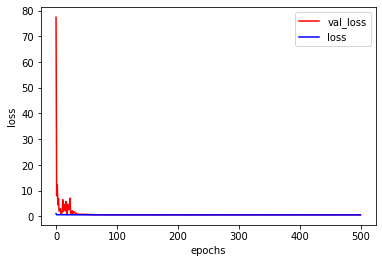

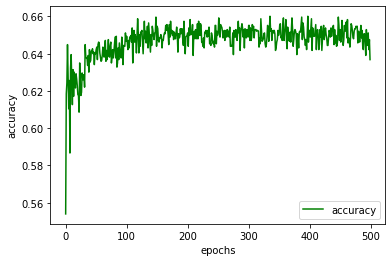

In [30]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

input_layer = tf.keras.Input(shape=x_train[0].shape)
x = tf.keras.layers.Dense(units=512, activation='relu')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(units=32, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)


# 옵티마이저는 SGD, RMSprop, Adam 테스트 해봄
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1),
                loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)
x_val = x_val.astype(float)
y_val = y_val.astype(float)

mcp_cb = ModelCheckpoint(filepath='C:/Users/user/Desktop/abc/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                       save_best_only=True, save_weights_only=True, mode='min', verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = model.fit(x_train, y_train, epochs=500, batch_size=32 * 10, verbose=1, validation_data=(x_val, y_val), callbacks=[rlr_cb])
predicted = model.predict(x_val)
print('\n\n"validation loss, accuracy"')
model.evaluate(x_val, y_val, verbose=1)

predicted = model.predict(x_test)
print('\n\n"test loss, accuracy"')
model.evaluate(x_test, y_test, verbose=1)

vloss = history.history['val_loss']
loss = history.history['loss']
acc = history.history['accuracy']

# 시각화
epoch_len = np.arange(len(acc))
plt.plot(epoch_len, vloss, c = 'red', label = 'val_loss')
plt.plot(epoch_len, loss, c = 'blue', label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'best')
plt.show()

plt.plot(epoch_len, acc, c = 'green', label = 'accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc = 'best')
plt.show()

## 정밀도, 재현율, F1스코어, ROC커브, AUC

정밀도: 0.42594484167517876
재현율: 0.7473118279569892
F1 스코어: 0.5426154847104749


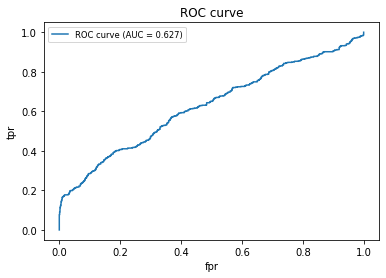

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# 분류 문제에서는 확률을 예측 결과로 사용하므로, 0.5를 기준으로 이진 분류를 수행합니다.
# 예측 확률이 0.5보다 크면 1로, 작으면 0으로 변환합니다.
y_pred_binary = (predicted > 0.5).astype(int)

# 정밀도 계산
precision = precision_score(y_test, y_pred_binary)

# 재현율 계산
recall = recall_score(y_test, y_pred_binary)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred_binary)

print("정밀도:", precision)
print("재현율:", recall)
print("F1 스코어:", f1)

# ravel은 차원축소
fpr, tpr, _ = roc_curve(y_test.ravel(), predicted.ravel())
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc(fpr, tpr))) # AUC : 0.627
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.legend(loc='upper left', fontsize='small')
plt.show()